In [ ]:
pip install prophet pystan yfinance

In [8]:
# libraries needed for the model
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet

In [ ]:
# function for prediction based of the parameters
def prediction(ticker, date, days):
    df = yf.download(ticker, start=date)
    df = df.reset_index()
    df[['ds', 'y']] = df[['Date', 'Adj Close']]
    df['ds'] = df['ds'].dt.tz_localize(None) #remove timezone information
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(days)
    forecast = model.predict(future)
    model.plot(forecast)
    plt.show()


[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp45_3uwjy/oe7fwksr.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmp45_3uwjy/yqm88nu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72281', 'data', 'file=/tmp/tmp45_3uwjy/oe7fwksr.json', 'init=/tmp/tmp45_3uwjy/yqm88nu7.json', 'output', 'file=/tmp/tmp45_3uwjy/prophet_modelwq5ta8y7/prophet_model-20230130174020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:40:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:40:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


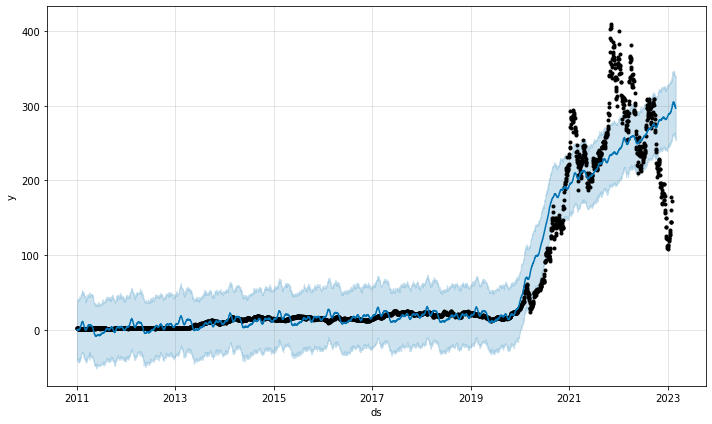

In [10]:
# invoking the function with the arguments
prediction('TSLA', '2011-01-01', 30)